# Interpolate and plot Z properties

## Import modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri

#Use inline, notebook or, widget if using vscode
%matplotlib inline

plt.style.use("seaborn-v0_8-talk")

## Read the data file and create a DataFrame

In [7]:
#Read from a CSV file
df = pd.read_csv("XYZ_data.txt")

#Get a general info about the data fields
df.describe()

,X,Y,Z0,Z1,Z2
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,21682.690500,19959.984000,279.672700,779.672700,1279.672700
std,9432.304223,8336.812374,102.355008,102.355008,102.355008
min,1446.750000,2614.000000,51.170000,551.170000,1051.170000
25%,14667.562500,13410.875000,222.482500,722.482500,1222.482500
50%,22051.000000,19823.250000,259.285000,759.285000,1259.285000
75%,29686.875000,26307.437500,326.512500,826.512500,1326.512500
max,38047.500000,39142.000000,638.330000,1138.330000,1638.330000


## Visualize input control points

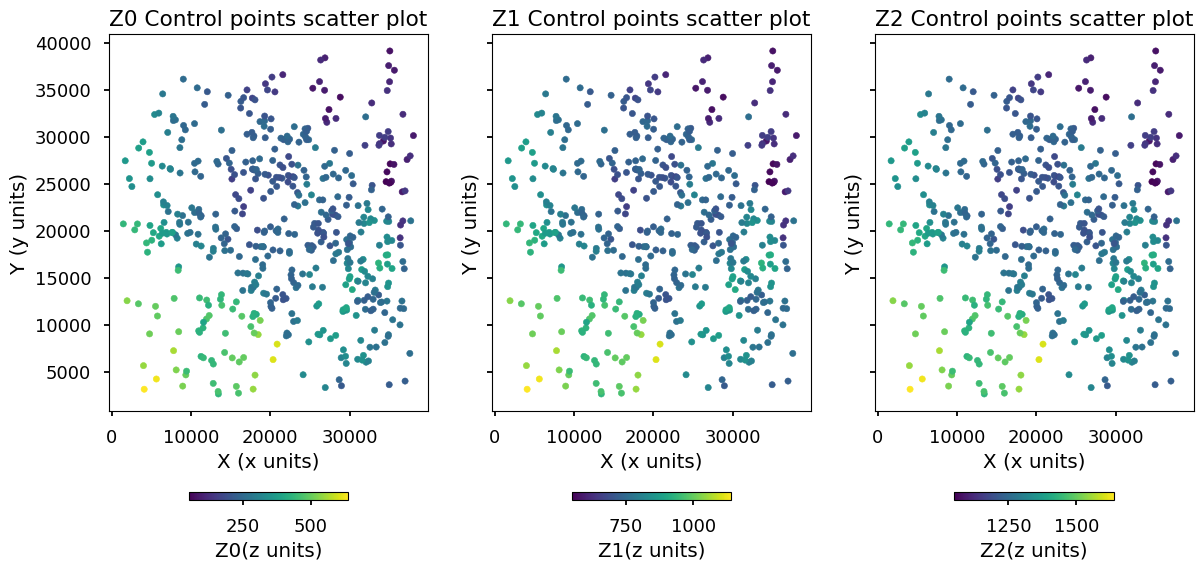

In [9]:
fig, ax = plt.subplots(1, 3, clear=True, sharey =True, figsize=(14, 7))

#List of plots
scatter = []

#Making dynamic statements to adapt to the number of subplots
for i in range(len(ax)):
    scatter.append(ax[i].scatter(df["X"], df["Y"], c=df["Z"+str(i)], s=20, vmin=df["Z"+str(i)].min(), vmax=df["Z"+str(i)].max()))
    fig.colorbar(scatter[i], location="bottom", label="Z"+ str(i) + "(z units)", shrink=0.5)
    ax[i].set_title("Z"+ str(i) + " Control points scatter plot")
    ax[i].set_xlabel("X (x units)")
    ax[i].set_ylabel("Y (y units)")

## Making a 2D grid to interpolate dato into

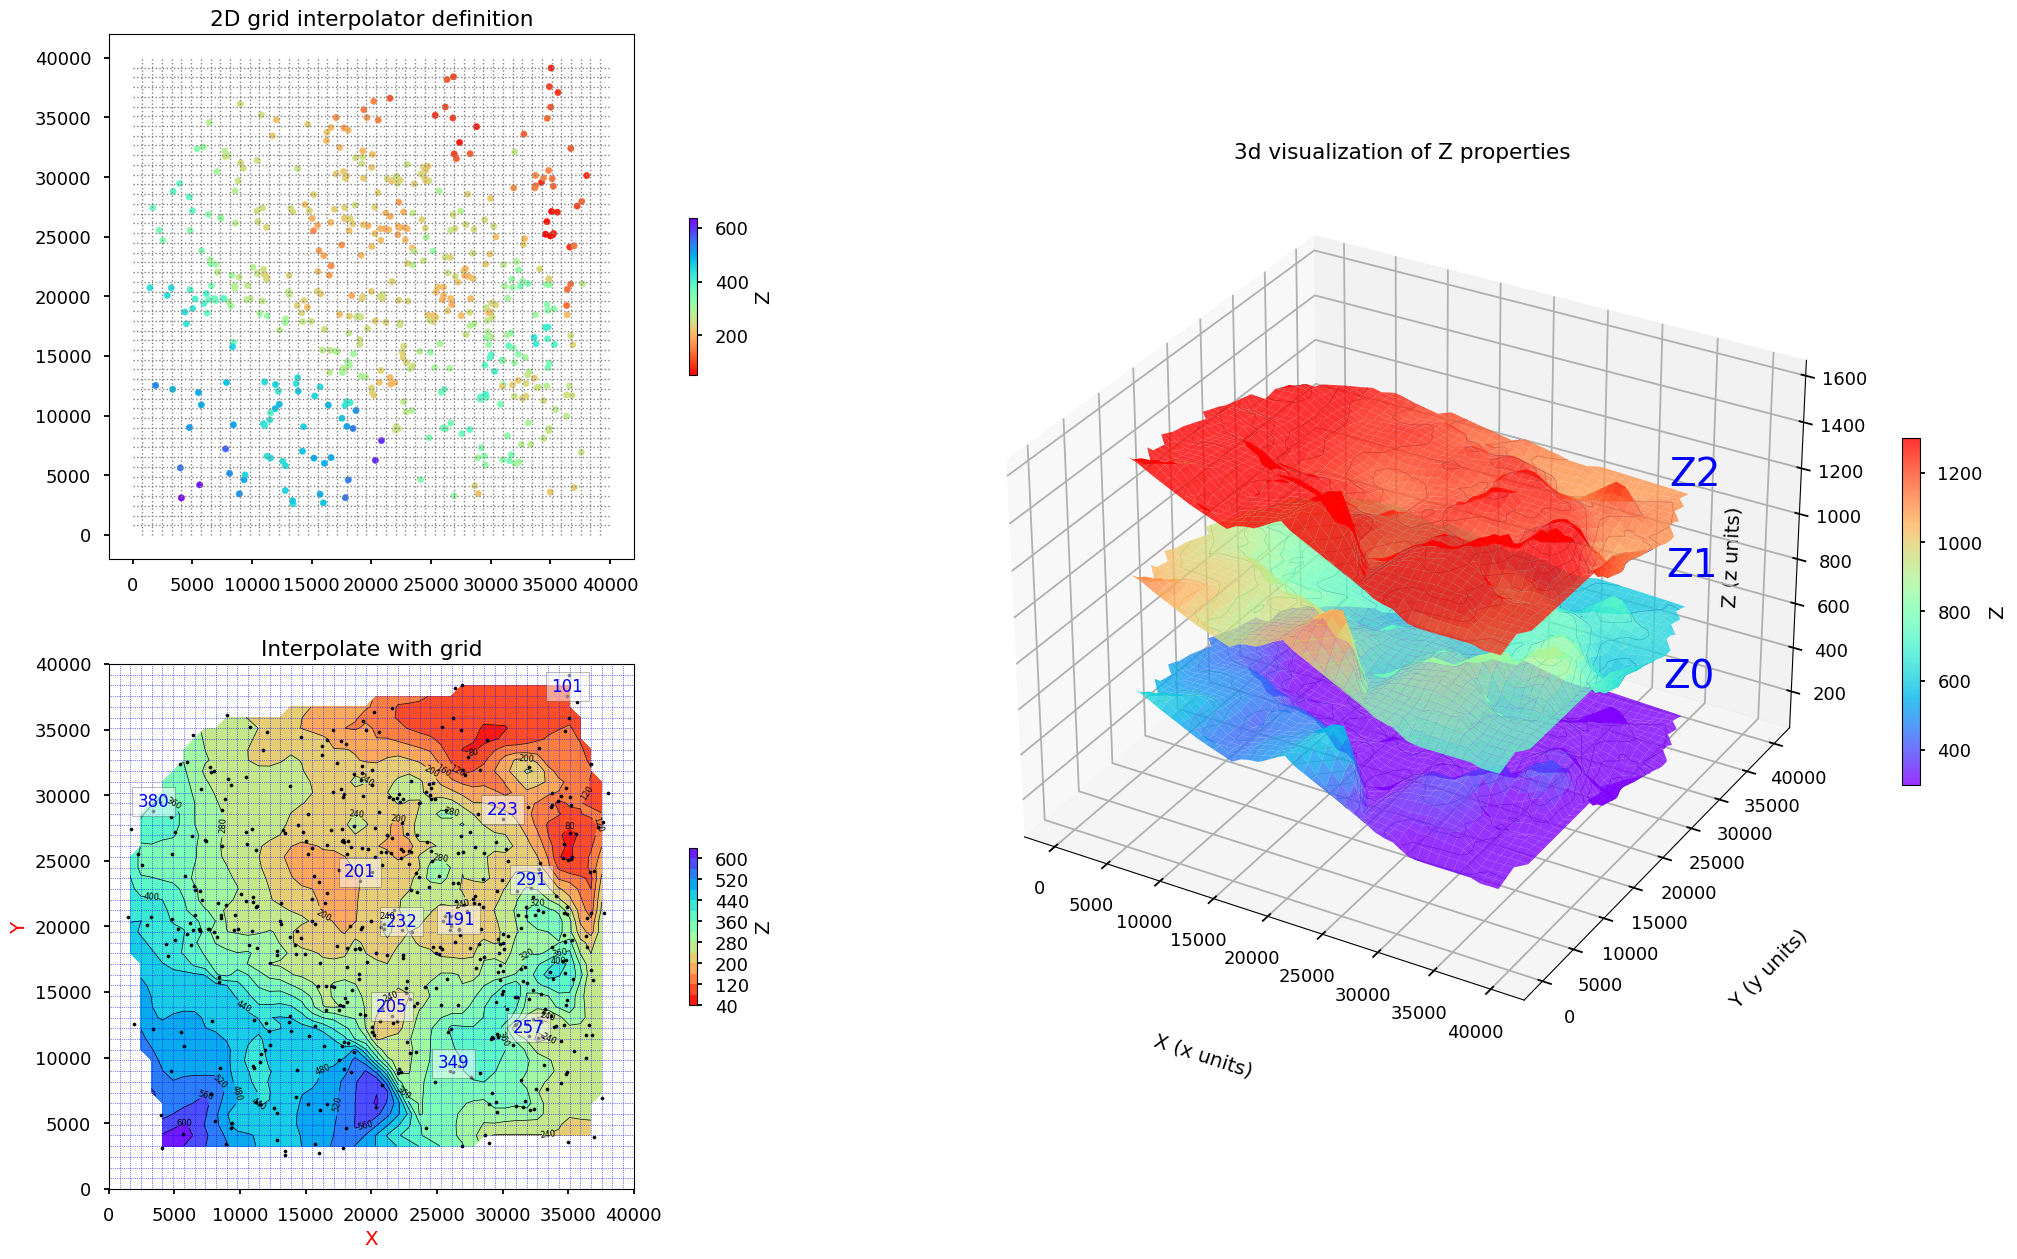

In [4]:
# Define grid divisions
ngridx = 50
ngridy = 50

# Create grid values first.
xi = np.linspace(0, 40000, ngridx)
yi = np.linspace(0, 40000, ngridy)


# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang0 = tri.Triangulation(df["X"],df["Y"])
triang1 = tri.Triangulation(df["X"],df["Y"])
triang2 = tri.Triangulation(df["X"],df["Y"])

interpolatorZ0 = tri.LinearTriInterpolator(triang0, df["Z0"])
interpolatorZ1 = tri.LinearTriInterpolator(triang1, df["Z1"])
interpolatorZ2 = tri.LinearTriInterpolator(triang2, df["Z2"])

Xi, Yi = np.meshgrid(xi, yi)

z0 = interpolatorZ0(Xi, Yi)
z1 = interpolatorZ1(Xi, Yi)
z2 = interpolatorZ2(Xi, Yi)

# Create the matplotlib figure
fig = plt.figure(figsize=(30,15))

# Plotting control points and filled contours in 2d
ax0 = plt.subplot2grid((2,4), (0, 0), colspan=2)
ax0.set_aspect("equal")
ax1 = plt.subplot2grid((2,4), (1, 0), colspan=2)
ax1.set_aspect("equal")

# Drawing lines on grid values to visualize the 2D grid
ax0.vlines(xi[1:-1], min(yi), max(yi), colors="gray", linestyles="dotted", lw=1)
ax0.hlines(yi[1:-1], min(xi), max(xi), colors="gray", linestyles="dotted", lw=1)

# Plot control points
ax0.set_title("2D grid interpolator definition")
controlpoints = ax0.scatter(df["X"], df["Y"], c=df["Z0"], s=20, cmap="rainbow_r")

fig.colorbar( controlpoints, ax=ax0, location="right", shrink=0.3, label = "Z")

# Plot contour
cntrlines= ax1.contour(xi, yi, z0, levels=14, linewidths=0.5, colors='k')
ax1.clabel(cntrlines, fontsize=6, inline=True)
cntrfilled = ax1.contourf(xi, yi, z0, levels=14, cmap="rainbow_r")

ax1.set_title("Interpolate with grid")
ax1.set_xlabel("X", c="red")
ax1.set_ylabel("Y", c="red")
ax1.set_xlim(0,40000)
ax1.set_ylim(0,40000)

fig.colorbar( cntrfilled, ax=ax1, location="right", shrink=0.3, label = "Z")


# Plot initial input data
ax1.scatter(df["X"], df["Y"],  c="black", alpha=1, s=20, marker=".")
ax1.vlines(xi[1:-1], min(yi), max(yi), colors="blue", linestyles="dotted", lw=0.5)
ax1.hlines(yi[1:-1], min(xi), max(xi), colors="blue", linestyles="dotted", lw=0.5)


# Label a sample of initial input data
dfsample = df.sample(10)
for (x, y, z) in zip(dfsample["X"], dfsample["Y"], dfsample["Z0"]):
    ax1.text(x, y, round(z), va='bottom', ha='center',fontsize=12, color="blue",  bbox=dict(facecolor='white', alpha=0.5))


# Plot 3D surfaces
ax2 = plt.subplot2grid((2,4), (0,2), colspan=2, rowspan=2, projection="3d")

surf0 = ax2.plot_surface(Xi, Yi, z0, alpha= 0.8, cmap="rainbow", vmin=300, vmax=1300)
surf1 = ax2.plot_surface(Xi, Yi, z1, alpha= 0.8, cmap="rainbow", vmin=300, vmax=1300)
surf2 = ax2.plot_surface(Xi, Yi, z2, alpha= 0.8, cmap="rainbow", vmin=300, vmax=1300)

fig.colorbar( surf0, ax=ax2, location="right", shrink=0.3, label = "Z")

cntrlines0= ax2.contour(xi, yi, z0, levels=14, linewidths=0.5)
cntrlines1= ax2.contour(xi, yi, z1, levels=14, linewidths=0.5)
cntrlines2= ax2.contour(xi, yi, z2, levels=14, linewidths=0.5)

ax2.text(35000,35000, 300, "Z0", color="b", fontsize=28)
ax2.text(35000,35000, 800, "Z1", color="b", fontsize=28)
ax2.text(35000,35000, 1200, "Z2", color="b", fontsize=28)

ax2.set_title("3d visualization of Z properties")
ax2.set_xlabel("X (x units)", labelpad=50)
ax2.set_ylabel("Y (y units)", labelpad=50)
ax2.set_zlabel("Z (z units)", labelpad=-50)

plt.show()